Import modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Load Dataset

In [2]:
data = pd.read_csv('../data/train_crime.csv', parse_dates=['Dates'])
print(data.shape)
data.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


데이터 탐색

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


1. Dates
 - "Dates"를 'year', 'month', 'day', 'hour', 'minute', 'second'로 분리하여 탐색 날짜를     지정한다.

In [4]:
data['Dates-year'] = data['Dates'].dt.year
data['Dates-month'] = data['Dates'].dt.month
data['Dates-day'] = data['Dates'].dt.day
data['Dates-hour'] = data['Dates'].dt.hour
data['Dates-minute'] = data['Dates'].dt.minute
data['Dates-second'] = data['Dates'].dt.second

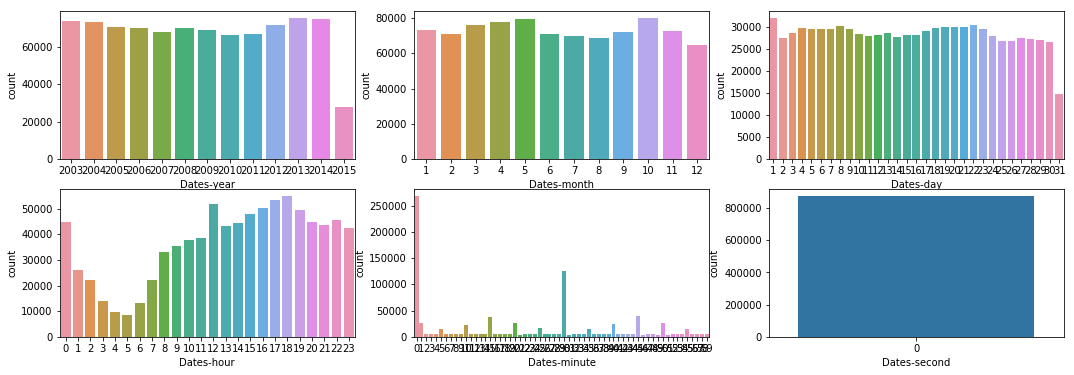

In [5]:
fig, ((axis1,axis2,axis3),(axis4,axis5,axis6)) = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(18,6)

sns.countplot(data=data, x='Dates-year', ax=axis1)
sns.countplot(data=data, x='Dates-month', ax=axis2)
sns.countplot(data=data, x='Dates-day', ax=axis3)
sns.countplot(data=data, x='Dates-hour', ax=axis4)
sns.countplot(data=data, x='Dates-minute', ax=axis5)
sns.countplot(data=data, x='Dates-second', ax=axis6)

Learned

1) Year field : 2015년은 5월까지의 기록이라 아마 다른 연도들과 비슷할 것 같아서 결과가                 비슷하게 나왔으므로 비교하는데 의미가 없다.

2) Month field : 연도와 비슷하게 확연히 차이가 없으므로 비교하는데 의미가 없다.

3) Day field : 확연하게 31일이 적은 이유는 1년 중에 31일이 있는 달  수가 적기 때문이다.

4) Hour field : 1~7시 사이의 새벽시간에 범죄의 분량이 적은 것으로 확인 가능하다. 

5) Minute field : 확연히 차이나는 곳이 있기에 자세하게 알아본다. 

6) Second field : 초는 비교하는데 의미가 없다.

날짜 - 시간 탐색

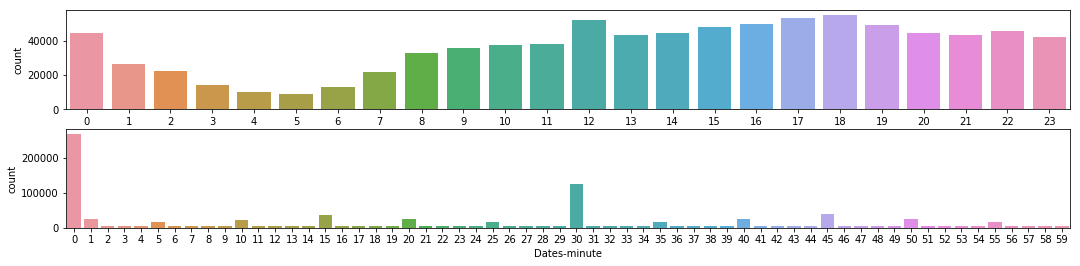

In [9]:
fig, (axis1,axis2) = plt.subplots(nrows=2, ncols=1, figsize=(18,4)) 
sns.countplot(data=data, x='Dates-hour', ax=axis1)
sns.countplot(data=data, x='Dates-minute', ax=axis2)

In [10]:
data['Dates-hour'].value_counts()[-5:]

7    22048
3    14014
6    13133
4     9863
5     8637
Name: Dates-hour, dtype: int64

5시가 가장 범죄율이 적게 나오는 걸 알 수가 있다.

In [11]:
def bin_data_minute(hour):
    if hour >=8 & hour ==0:
        return 'High_hour'
    else:
        return 'Low_hour'

 앞서서 시간의 범죄율을 따져봤을 때 1-7시 사이가 비교적 범죄율이 적은 것을 볼 수 있었다.
 
 시간과 분을 합치기 위하여 조건문을 사용한다.
 
 8시 이상일 때 High_hour, 그렇지 않으면 Low_hour로 지정하고 그 결과값을 bin_data_minute에 저장한다.

In [12]:
data['bin_dates_hour'] = data['Dates-hour'].apply(bin_data_minute)

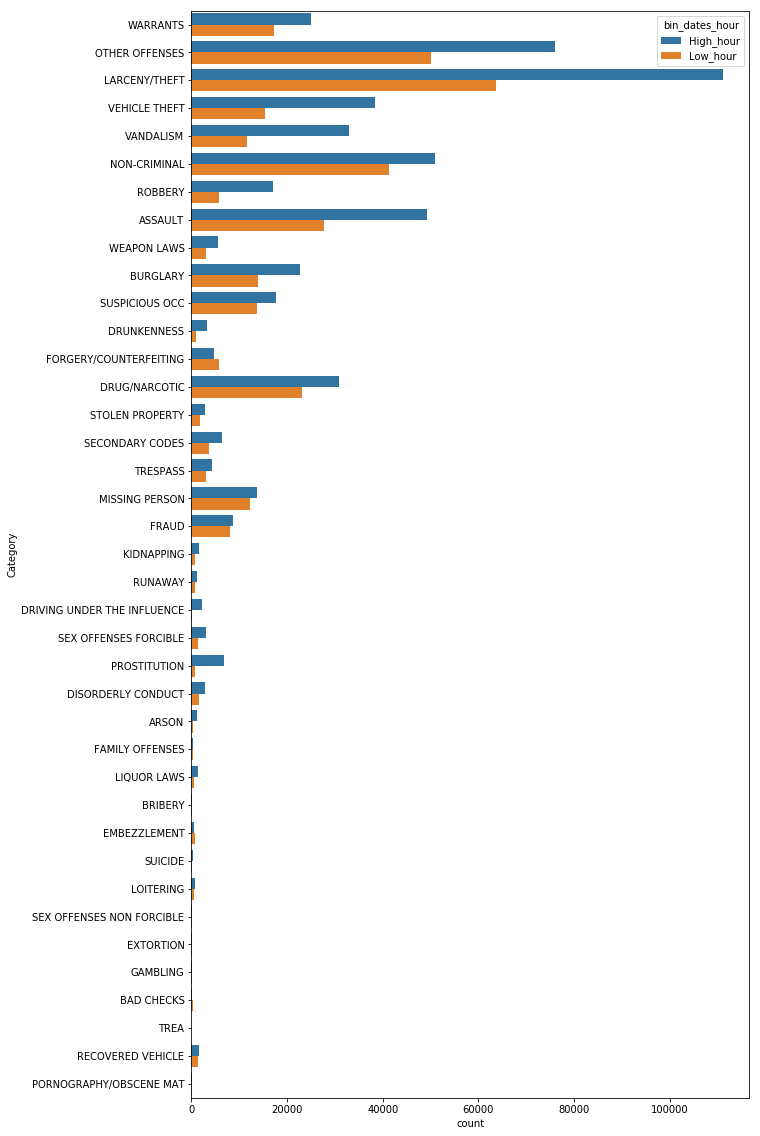

In [13]:
fig, axis1 = plt.subplots(figsize=(10,20))
sns.countplot(data=data, y='Category', hue='bin_dates_hour',ax=axis1)

대부분의 모든 범죄 사건들이 8시 이후에 일어난 것으로 보인다.

2. Address
  <Luis Fred>

In [15]:
def bin_address(address):
    if '/' in address:
        return 'Street'
    else:
        return 'Block'

"Address를 'Street'과 'Block'으로 구분하여 Address_type으로 저장한다.

In [16]:
data['Address_type'] = data['Address'].apply(bin_address)
data[['Address', 'Address_type']].head(10)

,Address,Address_type
0,OAK ST / LAGUNA ST,Street
1,OAK ST / LAGUNA ST,Street
2,VANNESS AV / GREENWICH ST,Street
3,1500 Block of LOMBARD ST,Block
4,100 Block of BRODERICK ST,Block
5,0 Block of TEDDY AV,Block
6,AVALON AV / PERU AV,Street
7,KIRKWOOD AV / DONAHUE ST,Street
8,600 Block of 47TH AV,Block
9,JEFFERSON ST / LEAVENWORTH ST,Street


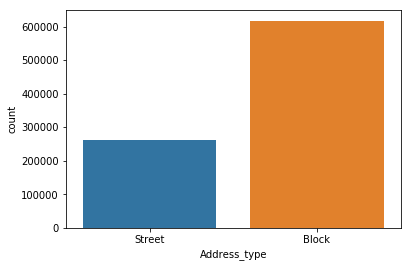

In [17]:
sns.countplot(data=data, x='Address_type')

'Street'과 'Block'의 비율을 시각화한다.

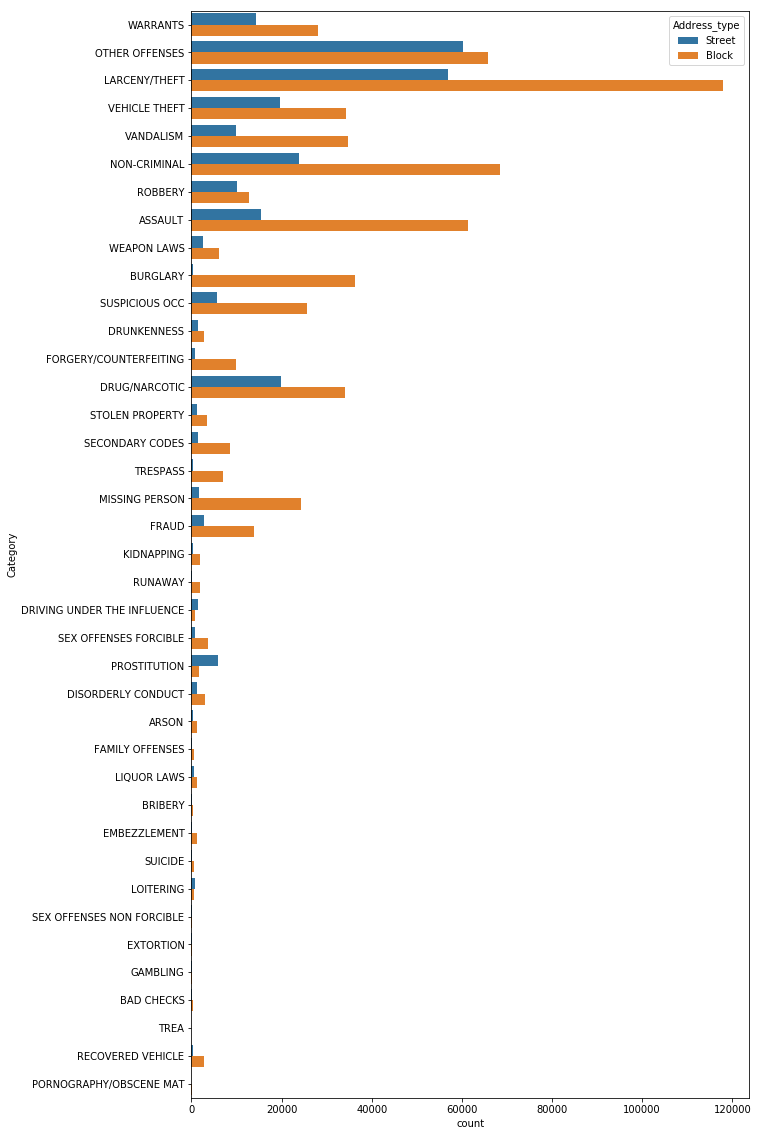

In [18]:
fig, axis1 = plt.subplots(figsize=(10,20))
sns.countplot(data=data, y='Category', hue='Address_type', ax=axis1)

countplot에서 hue와 x/y의 차이를 두면 더 많은 시각화를 할 수 있다.

추가적으로 39개 "Category"에 대해서도 시각화한다.

두 항목을 제외한 모든 항목들이 'Street'보다 'Block'에서의 범죄율이 높다는 결과가 나온다.

3. PdDistrict

In [19]:
data[['Category','PdDistrict']].head()

,Category,PdDistrict
0,WARRANTS,NORTHERN
1,OTHER OFFENSES,NORTHERN
2,OTHER OFFENSES,NORTHERN
3,LARCENY/THEFT,NORTHERN
4,LARCENY/THEFT,PARK


In [20]:
data['PdDistrict'].value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

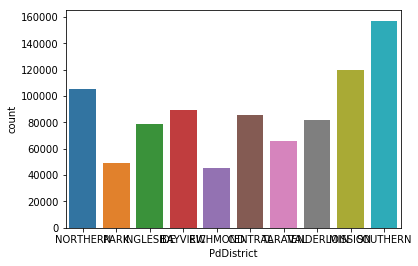

In [21]:
sns.countplot(data=data,  x='PdDistrict')